In [66]:
from BasisFilter import BasisFilter
import pandas as pd
import os
import copy
import numpy as np
import re
BF = BasisFilter()

In [68]:
dataset = pd.read_csv(f'{BF.path}//filtered_data//체중감량 예측모델 데이터셋.csv')

In [69]:
X = dataset.iloc[:,:33]
Y = dataset.iloc[:,33:]

In [70]:
X = X.drop('Date_1', axis =1)

In [71]:
# 각 열의 중간값 계산
medians = X.median()
# 결측값을 각 열의 중간값으로 채우기
X = X.fillna(medians)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1805 non-null   float64
 1   PatientSex                   1805 non-null   int64  
 2   Height                       1805 non-null   float64
 3   Coffee_기타                    1805 non-null   int64  
 4   Coffee_마시지않음                 1805 non-null   int64  
 5   Coffee_없음                    1805 non-null   int64  
 6   Coffee_있음                    1805 non-null   int64  
 7   Alcohol_거의 마시지 않는다 (월 1-2회)  1805 non-null   int64  
 8   Alcohol_기타                   1805 non-null   int64  
 9   Alcohol_주 1회                 1805 non-null   int64  
 10  Alcohol_주 2회 이상              1805 non-null   int64  
 11  HanbangX                     1805 non-null   int64  
 12  HanbangYX                    1805 non-null   int64  
 13  HanbangYY         

In [73]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Weight_After         1805 non-null   float64
 1   BMI_After            1805 non-null   float64
 2   SMM_After            1805 non-null   float64
 3   PBF_After            1805 non-null   float64
 4   SoftLeanMass_After   1805 non-null   float64
 5   FatFreeMass_After    1805 non-null   float64
 6   VFA_After            1805 non-null   float64
 7   WHR_After            1805 non-null   float64
 8   BMR_After            1805 non-null   float64
 9   MaxVital_After       1770 non-null   float64
 10  MinVital_After       1770 non-null   float64
 11  Pulse_After          1770 non-null   float64
 12  PercentOfLossWeight  1805 non-null   float64
dtypes: float64(13)
memory usage: 183.4 KB


In [74]:
#Y에 vital이 없는 경우는 X에서 데이터를 따로 뽑아 진행해야할 듯함

In [75]:
X.describe()

,Age,PatientSex,Height,Coffee_기타,Coffee_마시지않음,Coffee_없음,Coffee_있음,Alcohol_거의 마시지 않는다 (월 1-2회),Alcohol_기타,Alcohol_주 1회,...,PBF_1,Pulse_1,SMM_1,SoftLeanMass_1,VFA_1,WHR_1,Weight_1,apedrin1,apedrin2,Period
count,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,...,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000
mean,39.828255,1.860942,162.722543,0.004432,0.042105,0.721330,0.232133,0.563435,0.006648,0.218283,...,38.920886,84.750139,25.290028,43.440222,145.046205,0.930094,75.812964,109.044321,115.756233,89.727978
std,11.689079,0.346103,8.067549,0.066445,0.200885,0.448469,0.422310,0.496097,0.081288,0.413195,...,5.760083,12.990452,5.318260,8.299702,39.226295,0.061214,13.752251,11.250190,11.795390,15.489705
min,19.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.300000,0.000000,16.000000,29.000000,51.700000,0.700000,49.900000,80.000000,80.000000,23.000000
25%,30.000000,2.000000,158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.600000,76.000000,21.800000,38.000000,115.800000,0.890000,65.900000,105.000000,105.000000,79.000000
50%,39.000000,2.000000,162.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,39.000000,83.000000,23.900000,41.400000,141.000000,0.920000,72.600000,105.000000,115.000000,91.000000
75%,49.000000,2.000000,167.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,42.600000,93.000000,26.700000,45.700000,170.000000,0.970000,82.700000,115.000000,125.000000,100.000000
max,71.000000,2.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,55.900000,133.000000,55.800000,90.900000,280.700000,1.220000,149.300000,145.000000,145.000000,120.000000


In [76]:
dataset.loc[dataset['Pulse_1'] == 0, 'Pulse_1'] = 83
dataset.loc[dataset['MaxVital_1'] > 1000, 'MaxVital_1'] = medians['MaxVital_1']
dataset.loc[dataset['MinVital_1'] < 20, 'MinVital_1'] = medians['MinVital_1']
dataset.loc[dataset['WHR_1'] > 3, 'WHR_1'] = medians['WHR_1']
dataset['MaxVital_1'].fillna(medians['MaxVital_1'], inplace =True)
dataset['MinVital_1'].fillna(medians['MinVital_1'], inplace =True)
dataset['Pulse_1'].fillna(83, inplace =True)

In [77]:
dataset = dataset[dataset['BMI_1']<50]


In [78]:
dataset = dataset.drop('Date_1', axis = 1)

In [79]:
import pandas as pd


# NaN이 포함된 열 찾기
nan_columns = dataset.columns[dataset.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
['MaxVital_After', 'MinVital_After', 'Pulse_After']


In [80]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import aic, bic
import statsmodels.api as sm

X = dataset.iloc[:, :32]  # 특성
y = dataset.iloc[:, 32]  # 레이블

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Lasso 회귀 모델
lasso = Lasso(alpha=0.01)  # alpha 값은 정규화 강도를 조절합니다.
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

selected_features = X_train.columns[lasso_coef != 0]
print("Selected Features by Lasso:", selected_features)

Selected Features by Lasso: Index(['Age', 'PatientSex', 'Height', 'Coffee_없음', 'Alcohol_주 2회 이상',
       'HanbangX', 'HanbangYX', 'HanbangYY', 'YangbangX', 'YangbangYY',
       'BMI_1', 'BMR_1', 'MaxVital_1', 'MinVital_1', 'Pulse_1', 'SMM_1',
       'VFA_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period'],
      dtype='object')


C:\Users\howsr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.118e+03, tolerance: 1.646e+00
  model = cd_fast.enet_coordinate_descent(


In [82]:
# Lasso 회귀 모델
lasso = Lasso(alpha=0.1)  # alpha 값은 정규화 강도를 조절합니다.
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

selected_features = X_train.columns[lasso_coef != 0]
print("The Number of Selected Features by Lasso:", len(selected_features))
print("Selected Features by Lasso:", selected_features)

The Number of Selected Features by Lasso: 12
Selected Features by Lasso: Index(['Age', 'Height', 'YangbangX', 'BMR_1', 'MaxVital_1', 'MinVital_1',
       'Pulse_1', 'VFA_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period'],
      dtype='object')


In [83]:
X_train[selected_features]

,Age,Height,YangbangX,BMR_1,MaxVital_1,MinVital_1,Pulse_1,VFA_1,Weight_1,apedrin1,apedrin2,Period
1739,26.0,161.0,1,1352.0,119.0,67.0,82.0,122.1,72.3,105,115,100.0
1357,25.0,160.0,1,1278.0,162.0,106.0,121.0,198.8,80.4,105,105,61.0
1043,37.0,165.0,1,1318.0,117.0,61.0,87.0,138.1,71.5,105,105,91.0
836,31.0,159.0,1,1231.0,135.0,78.0,113.0,180.2,74.0,115,125,77.0
963,48.0,163.0,1,1340.0,133.0,80.0,82.0,181.9,82.3,105,105,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,23.0,168.0,0,1472.0,111.0,63.0,73.0,159.5,85.0,125,125,110.0
1294,66.0,166.0,1,1706.0,139.0,80.0,73.0,156.9,93.4,125,125,115.0
860,30.0,168.3,0,1393.0,121.0,70.0,95.0,179.6,80.4,115,125,94.0
1459,64.0,152.9,0,1170.0,135.0,75.0,98.0,133.1,61.7,105,115,74.0


In [84]:
def calculate_metrics(X_train, y_train, X_test, y_test, selected_features):
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    model = sm.OLS(y_train, sm.add_constant(X_train_subset)).fit()
    y_pred = model.predict(sm.add_constant(X_test_subset))
    
    # Adjusted R^2 계산
    adj_r2 = 1 - (1 - model.rsquared) * (len(y_test) - 1) / (len(y_test) - X_test_subset.shape[1] - 1)
    
    # AIC 및 BIC 계산
    aic_value = model.aic
    bic_value = model.bic
    
    return adj_r2, aic_value, bic_value

def get_feature_combinations(X_train):
    feature_combinations = []
    num_features = X_train.shape[1]
    
    for r in range(2, num_features + 1):
        combinations = itertools.combinations(X_train.columns, r)
        feature_combinations.extend(combinations)
    
    return feature_combinations


In [86]:
X = dataset.iloc[:, :32]
X = X[selected_features] # 특성
y = dataset.iloc[:, 32]  # 레이블

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 변수 조합 생성
feature_combinations = get_feature_combinations(X_train)

# 결과 저장을 위한 리스트
results = []

# 각 조합에 대해 메트릭 계산
for features in feature_combinations:
    adj_r2, aic_value, bic_value = calculate_metrics(X_train, y_train, X_test, y_test, list(features))
    results.append({
        'Features': features,
        'Adjusted R^2': adj_r2,
        'AIC': aic_value,
        'BIC': bic_value
    })
    #print(f'Features: {features}\nAdjusted R^2: {adj_r2}, AIC: {aic_value}, BIC: {bic_value}\n')

# DataFrame으로 변환
results_df = pd.DataFrame(results)

# 최적의 조합 찾기
best_adj_r2 = results_df.loc[results_df['Adjusted R^2'].idxmax()]
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

print("Best Adjusted R^2 Combination:", best_adj_r2)
print("Best AIC Combination:", best_aic)
print("Best BIC Combination:", best_bic)

# 시각화
plt.figure(figsize=(18, 6))

# Adjusted R^2
plt.subplot(1, 3, 1)
sns.scatterplot(x=results_df['Features'].apply(lambda x: len(x)), y=results_df['Adjusted R^2'])
plt.title('Adjusted R^2 vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R^2')

# AIC
plt.subplot(1, 3, 2)
sns.scatterplot(x=results_df['Features'].apply(lambda x: len(x)), y=results_df['AIC'])
plt.title('AIC vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('AIC')

# BIC
plt.subplot(1, 3, 3)
sns.scatterplot(x=results_df['Features'].apply(lambda x: len(x)), y=results_df['BIC'])
plt.title('BIC vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('BIC')

plt.tight_layout()
plt.savefig(f'{BF.path}\\Find Best Feature Set.png', dpi=300, bbox_inches='tight')
plt.show()



KeyboardInterrupt



In [89]:
print("Best Adjusted R^2 Combination:", best_adj_r2['Features'])
print("Best AIC Combination:", best_aic['Features'])
print("Best BIC Combination:", best_bic['Features'])

Best Adjusted R^2 Combination: ('Age', 'YangbangX', 'BMR_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period')
Best AIC Combination: ('Age', 'Height', 'YangbangX', 'BMR_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period')
Best BIC Combination: ('Age', 'YangbangX', 'BMR_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period')


In [90]:
feature_set1 =list(best_adj_r2['Features'])
feature_set2 =list(best_aic['Features'])

Model Summary for Feature Set 1:
                            OLS Regression Results                            
Dep. Variable:           Weight_After   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     100.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          4.52e-120
Time:                        16:30:13   Log-Likelihood:                -3515.0
No. Observations:                1443   AIC:                             7046.
Df Residuals:                    1435   BIC:                             7088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.14

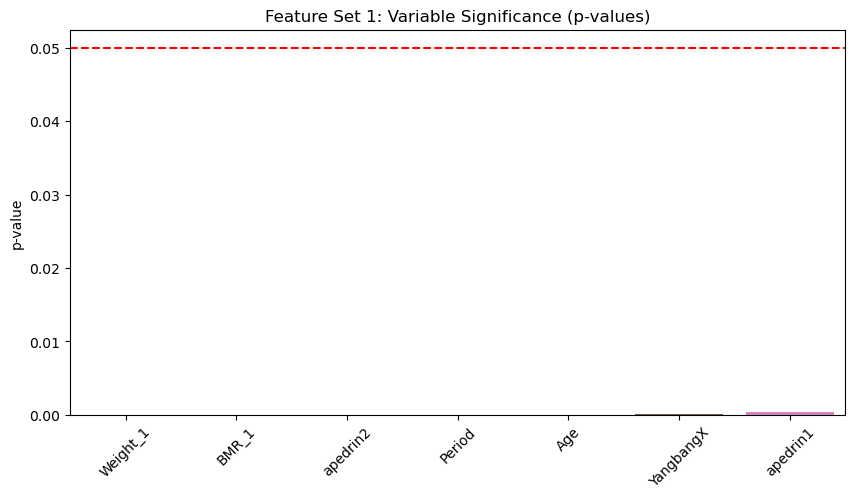

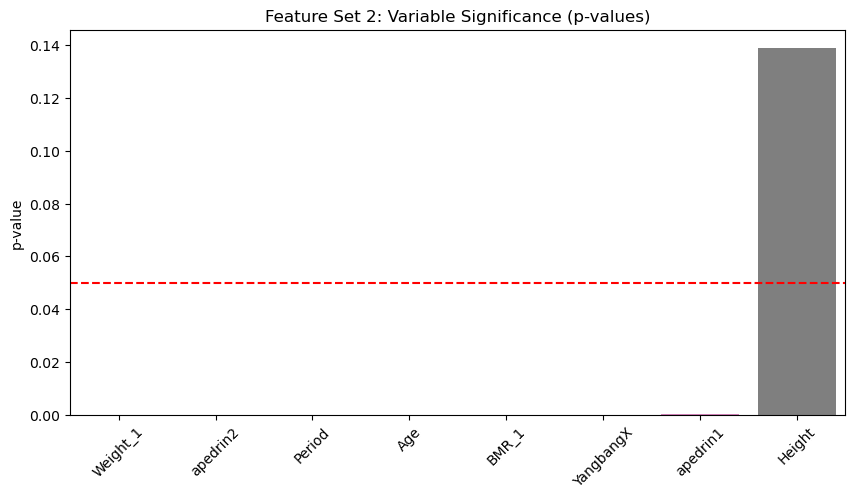

In [91]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 예제용 데이터프레임 (X_train, y_train)를 사용하여 다중선형회귀 모델을 구성
# 이 예제에서는 X_train과 y_train이 이미 정의되어 있다고 가정합니다.

# 기능 세트 1에 대한 모델
X_train_set1 = X_train[feature_set1]
X_train_set1_const = sm.add_constant(X_train_set1)  # 상수항 추가
model_set1 = sm.OLS(y_train, X_train_set1_const).fit()

# 모델 요약 출력
print("Model Summary for Feature Set 1:")
print(model_set1.summary())

# 기능 세트 2에 대한 모델
X_train_set2 = X_train[feature_set2]
X_train_set2_const = sm.add_constant(X_train_set2)  # 상수항 추가
model_set2 = sm.OLS(y_train, X_train_set2_const).fit()

# 모델 요약 출력
print("Model Summary for Feature Set 2:")
print(model_set2.summary())

# 변수들의 유의성 시각화
def plot_pvalues(model, title):
    pvalues = model.pvalues[1:]  # 상수항 제외
    pvalues = pvalues.sort_values(ascending=True)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pvalues.index, y=pvalues.values)
    plt.axhline(0.05, color='red', linestyle='--')
    plt.title(title)
    plt.ylabel('p-value')
    plt.xticks(rotation=45)
    plt.show()

# Feature Set 1의 변수 유의성 시각화
plot_pvalues(model_set1, 'Feature Set 1: Variable Significance (p-values)')

# Feature Set 2의 변수 유의성 시각화
plot_pvalues(model_set2, 'Feature Set 2: Variable Significance (p-values)')


In [92]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 최종 선택된 변수 목록
selected_features = ['Age', 'YangbangX', 'BMR_1', 'Weight_1', 'apedrin1', 'apedrin2', 'Period']

# 데이터프레임 (X_train, y_train)을 사용하여 다중선형회귀 모델을 구성
# 이 예제에서는 X_train과 y_train이 이미 정의되어 있다고 가정합니다.

# 최종 조합에 2차항 추가
X_train_final = X_train[selected_features].copy()
X_train_final['Period^2'] = (X_train_final['Period']-X_train_final['Period'].mean()) ** 2


# 모델에 상수항 추가
X_train_final_const = sm.add_constant(X_train_final)

# 다중선형회귀 모델 학습
model_final = sm.OLS(y_train, X_train_final_const).fit()

# 모델 요약 출력
print("Model Summary with Period^2:")
print(model_final.summary())

# 2차항 유의성 확인
p_value_period2 = model_final.pvalues['Period^2']
print(f"p-value of Period^2: {p_value_period2}")

# 유의성 판단
alpha = 0.05  # 유의 수준
if p_value_period2 < alpha:
    print("The 2nd order term of Period is statistically significant.")
else:
    print("The 2nd order term of Period is not statistically significant.")

Model Summary with Period^2:
                            OLS Regression Results                            
Dep. Variable:           Weight_After   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     91.42
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.13e-122
Time:                        16:30:29   Log-Likelihood:                -3506.5
No. Observations:                1443   AIC:                             7031.
Df Residuals:                    1434   BIC:                             7078.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9165  

C:\Users\howsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


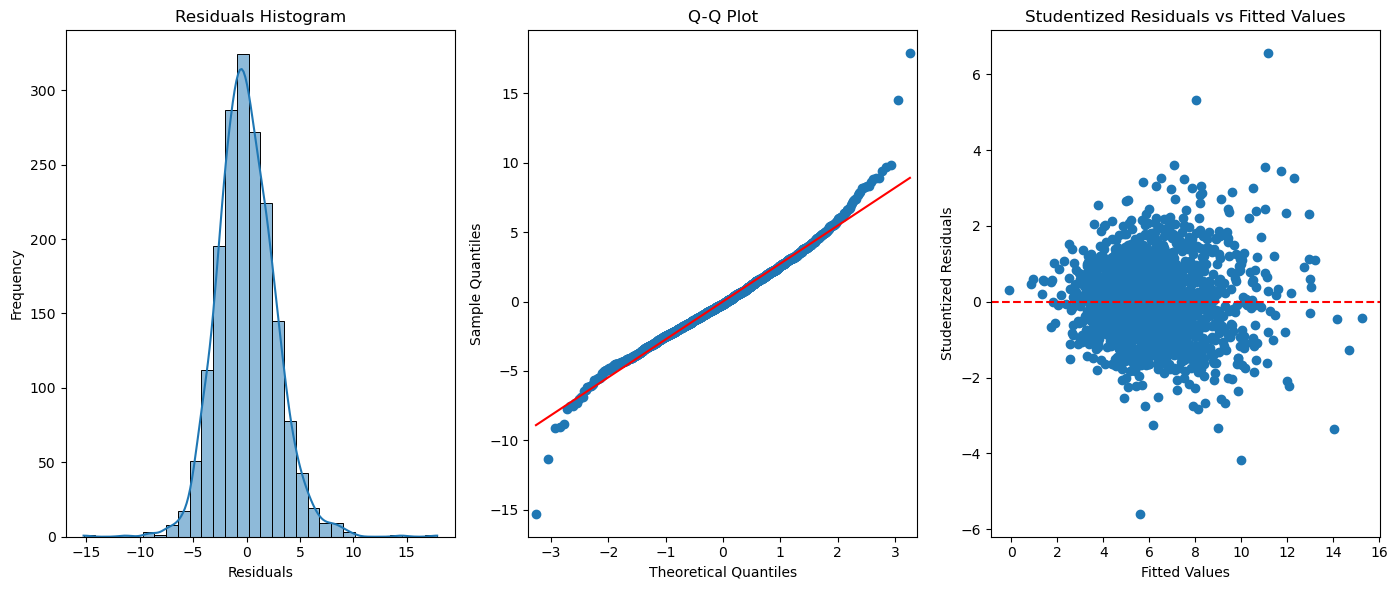

Residuals Summary:
count    1.804000e+03
mean     1.123319e-14
std      2.729292e+00
min     -1.527311e+01
25%     -1.764702e+00
50%     -1.930945e-01
75%      1.649082e+00
max      1.786148e+01
dtype: float64
Durbin-Watson Statistic: 1.9303105743041302


In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 잔차 계산
residuals = model_final.resid

# 준스튜던트화 잔차 계산
influence = model_final.get_influence()
studentized_residuals = influence.resid_studentized_internal

# 잔차 분석
def plot_residuals_analysis(model, residuals, studentized_residuals):
    # 히스토그램
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title('Residuals Histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Q-Q 플롯 (정규성 검증)
    plt.subplot(1, 3, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title('Q-Q Plot')

    # 준스튜던트화 잔차 대 예측값 플롯
    plt.subplot(1, 3, 3)
    plt.scatter(model.fittedvalues, studentized_residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Studentized Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Studentized Residuals')

    plt.tight_layout()
    plt.show()

# 잔차 분석 함수 호출
plot_residuals_analysis(model_final, residuals, studentized_residuals)

# 잔차의 요약 통계
print("Residuals Summary:")
print(residuals.describe())

# Durbin-Watson 검정 (잔차의 독립성 검증)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {durbin_watson}")



In [94]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 전체 데이터 (X, y)를 사용하여 다중선형회귀 모델을 구성
# 이 예제에서는 X와 y가 전체 데이터를 포함하고 있다고 가정합니다.
X = dataset.iloc[:, :32]
y = dataset.iloc[:, 32] 


# 최종 조합에 2차항 추가
X_final = X[selected_features].copy()
X_final['Period^2'] = (X_final['Period'] - X_final['Period'].mean()) ** 2

# 모델에 상수항 추가
X_final_const = sm.add_constant(X_final)

# 다중선형회귀 모델 학습
model_final = sm.OLS(y, X_final_const).fit()

# 준스튜던트화 잔차 계산
influence = model_final.get_influence()
studentized_residuals = influence.resid_studentized_internal

# 이상치 인덱스 선택 (절대값이 4 이상인 경우)
outliers_index = np.where(np.abs(studentized_residuals) >= 4)[0]

print(X_final_const.loc[outliers_index])
# 이상치를 제외한 데이터셋
# X와 y의 인덱스를 일치시키기 위해 인덱스 기반으로 필터링
X_filtered = X_final_const.drop(index=X_final_const.index[outliers_index])
y_filtered = y.drop(index=y.index[outliers_index])

# 필터링된 데이터로 모델 재학습
model_final_filtered = sm.OLS(y_filtered, X_filtered).fit()

# 결과 출력
print(f"Number of outliers detected: {len(outliers_index)}")
print("Outliers indices:", outliers_index)
print("Filtered X shape:", X_filtered.shape)
print("Filtered y shape:", y_filtered.shape)

# 재학습된 모델 요약 출력
print("\nRe-fitted Model Summary after Outlier Removal:")
print(model_final_filtered.summary())


      const   Age  YangbangX   BMR_1  Weight_1  apedrin1  apedrin2  Period  \
693     1.0  25.0          1  1484.0     101.6       125       125   112.0   
906     1.0  39.0          1  1418.0      74.0       115       125    99.0   
964     1.0  43.0          1  1871.0      96.2       115       115    94.0   
1664    1.0  48.0          1  1365.0      88.1       115       125    98.0   

        Period^2  
693   495.605332  
906    85.788258  
964    18.166307  
1664   68.263868  
Number of outliers detected: 4
Outliers indices: [ 693  906  964 1664]
Filtered X shape: (1800, 9)
Filtered y shape: (1800,)

Re-fitted Model Summary after Outlier Removal:
                            OLS Regression Results                            
Dep. Variable:           Weight_After   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     112.7
Date:                Fri,

1800
1800


C:\Users\howsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


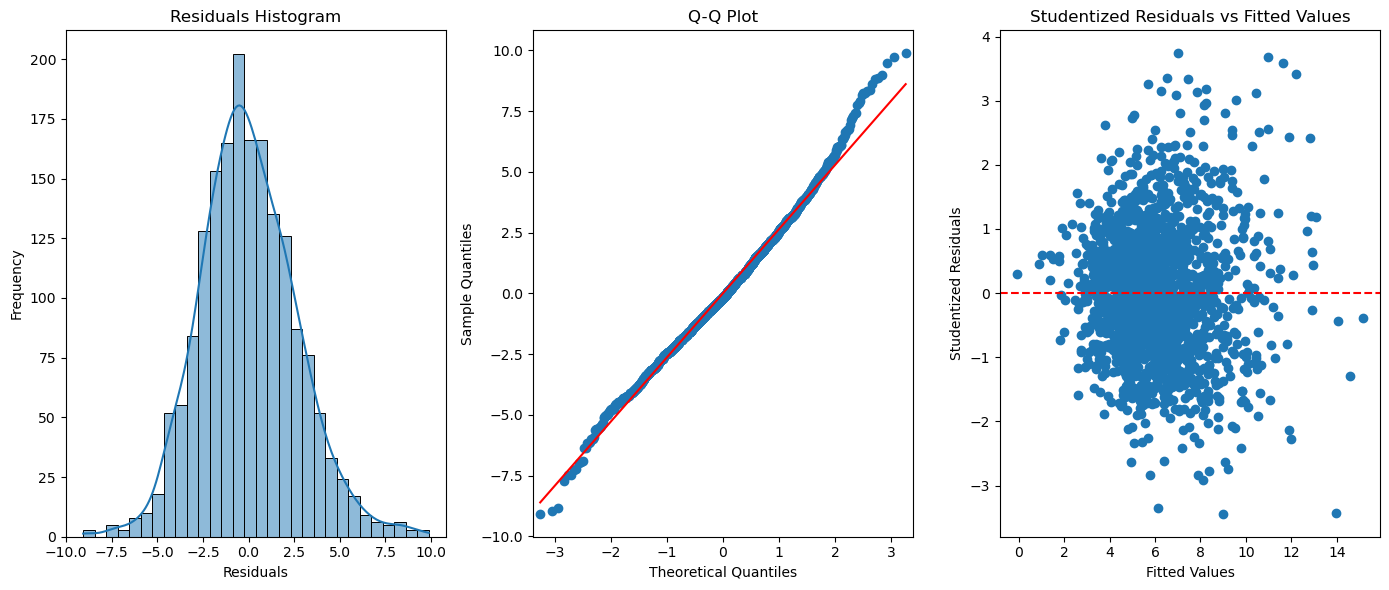

Residuals Summary:
count    1.800000e+03
mean    -1.658723e-14
std      2.639912e+00
min     -9.070695e+00
25%     -1.749234e+00
50%     -1.750895e-01
75%      1.644413e+00
max      9.872992e+00
dtype: float64
Durbin-Watson Statistic: 1.9319055060966521


In [99]:
# 잔차 계산
residuals = model_final_filtered.resid

# 준스튜던트화 잔차 계산
influence = model_final_filtered.get_influence()
studentized_residuals = influence.resid_studentized_internal

print(len(residuals))
print(len(studentized_residuals))

# 잔차 분석 함수 호출
plot_residuals_analysis(model_final_filtered, residuals, studentized_residuals)

# 잔차의 요약 통계
print("Residuals Summary:")
print(residuals.describe())

# Durbin-Watson 검정 (잔차의 독립성 검증)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {durbin_watson}")

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# 전체 데이터 (X, y)를 사용하여 다중선형회귀 모델을 구성
# 이 예제에서는 X와 y가 전체 데이터를 포함하고 있다고 가정합니다.

# 최종 조합에 2차항 추가
X_final = X[selected_features].copy()
X_final['Period^2'] = (X_final['Period'] - X_final['Period'].mean()) ** 2

# 모델에 상수항 추가
X_final_const = sm.add_constant(X_final)

# 다중선형회귀 모델 학습 (통계 모델)
model_final = sm.OLS(y, X_final_const).fit()

# 준스튜던트화 잔차 계산
influence = model_final.get_influence()
studentized_residuals = influence.resid_studentized_internal

# 이상치 인덱스 선택 (절대값이 4 이상인 경우)
outliers_index = np.where(np.abs(studentized_residuals) >= 4)[0]

# 이상치를 제외한 데이터셋
# X와 y의 인덱스를 일치시키기 위해 인덱스 기반으로 필터링
X_filtered = X_final_const.drop(index=X_final_const.index[outliers_index])
y_filtered = y.drop(index=y.index[outliers_index])

# 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=5),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
    'NeuralNetwork': MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500)
}

# 교차 검증을 통한 성능 평가
print("Model Performance after Outlier Removal:")
for name, model in models.items():
    if name == 'NeuralNetwork':
        # Neural Network 모델은 통상적으로 verbose를 설정하여 진행 상황을 출력할 수 있습니다.
        # 이로 인해 출력이 많을 수 있으니, 필요에 따라 verbose 파라미터를 조정하세요.
        model.fit(X_filtered, y_filtered)  # Neural Network 모델은 fit 메서드를 직접 호출해야 함
        scores = cross_val_score(model, X_filtered, y_filtered, cv=5, scoring='neg_mean_squared_error')
    else:
        scores = cross_val_score(model, X_filtered, y_filtered, cv=5, scoring='neg_mean_squared_error')
    
    print(f"{name} Model:")
    print(f"Mean Cross-Validation Score: {-scores.mean():.4f}")  # 음수 MSE를 양수 MSE로 변환
    print(f"Standard Deviation: {scores.std():.4f}\n")


Model Performance after Outlier Removal:
LinearRegression Model:
Mean Cross-Validation Score: 7.0490
Standard Deviation: 0.5023

Ridge Model:
Mean Cross-Validation Score: 7.0490
Standard Deviation: 0.5024

Lasso Model:
Mean Cross-Validation Score: 7.1012
Standard Deviation: 0.5156

ElasticNet Model:
Mean Cross-Validation Score: 7.0698
Standard Deviation: 0.5108

DecisionTree Model:
Mean Cross-Validation Score: 8.2201
Standard Deviation: 0.5920

RandomForest Model:
Mean Cross-Validation Score: 7.5108
Standard Deviation: 0.5423

GradientBoosting Model:
Mean Cross-Validation Score: 7.9580
Standard Deviation: 0.4684

SVR Model:
Mean Cross-Validation Score: 9.0795
Standard Deviation: 0.4359

NeuralNetwork Model:
Mean Cross-Validation Score: 8.5834
Standard Deviation: 1.2522



In [110]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 상수항 추가
X_const = sm.add_constant(X_final)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


    Variable         VIF
0      const  197.084827
1        Age    1.068726
2  YangbangX    1.133021
3      BMR_1    3.661439
4   Weight_1    4.645198
5   apedrin1    5.953846
6   apedrin2    4.790617
7     Period    1.085009
8   Period^2    1.080964


In [ ]:
import scipy.stats as stats

# 70% 분위수에 해당하는 값 계산 (상위 30%)
percentile_70 = stats.norm.ppf(0.70)

print(f"상위 30%에 해당하는 표준 정규 분포 값: {percentile_70:.4f}")
